In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')

In [3]:
print('Quantidade de alunos: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de alunos: 400


In [4]:
frames = [nomes_f, nomes_m]

In [5]:
nomes = pd.concat(frames)['nome'].to_frame()

In [6]:
import numpy as np
np.random.seed(123)

In [7]:
total_alunos = len(nomes)
total_alunos

400

In [8]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [9]:
nomes.head(10)

,nome,id_aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343
5,JULIANA,310
6,MARCIA,55
7,FERNANDA,288
8,PATRICIA,379
9,ALINE,92


In [10]:
dominios = ['@dominio.com.br', '@email.com.br']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [11]:
nomes.sample(10)

,nome,id_aluno,dominio
46,FABIANA,358,@email.com.br
38,DIEGO,294,@dominio.com.br
136,NILTON,271,@dominio.com.br
119,MOISES,4,@email.com.br
101,GISELE,298,@email.com.br
105,PABLO,141,@email.com.br
184,MARILIA,282,@email.com.br
58,DAVI,131,@email.com.br
18,RAIMUNDO,70,@email.com.br
89,ROSANA,166,@email.com.br


In [12]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [13]:
!pip3 install html5lib
!pip3 install lxml

In [14]:
import html5lib

In [15]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [16]:
cursos = cursos[0]

In [17]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [18]:
cursos.rename(columns={'Nome do curso' : 'nome_do_curso'}, inplace = True)

In [19]:
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [20]:
cursos['id'] = cursos.index + 1

In [21]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [22]:
cursos = cursos.set_index('id')
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [23]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [24]:
nomes.sample(10)

,nome,id_aluno,dominio,email,matriculas
153,CAUA,77,@email.com.br,caua@email.com.br,2
36,DEBORA,338,@dominio.com.br,debora@dominio.com.br,1
135,ROSILENE,387,@email.com.br,rosilene@email.com.br,2
176,CELIO,388,@email.com.br,celio@email.com.br,3
144,VINICIOS,147,@email.com.br,vinicios@email.com.br,1
16,JULIA,191,@email.com.br,julia@email.com.br,1
141,ORLANDO,159,@email.com.br,orlando@email.com.br,2
118,SANDRO,68,@email.com.br,sandro@email.com.br,1
10,LUIS,125,@email.com.br,luis@email.com.br,2
108,VILMA,31,@email.com.br,vilma@email.com.br,1


In [25]:
nomes.matriculas.describe()

count    400.000000
mean       1.920000
std        1.460799
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: matriculas, dtype: float64

In [26]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

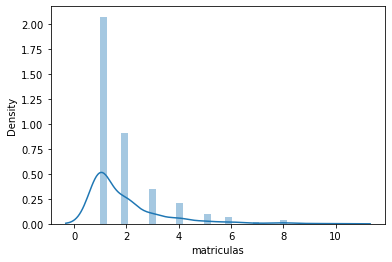

In [27]:
sns.distplot(nomes['matriculas'])

In [28]:
nomes['matriculas'].value_counts()

1     220
2      96
3      37
4      22
5      10
6       7
8       4
7       2
10      1
9       1
Name: matriculas, dtype: int64

In [29]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [30]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range (matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
        
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])        

In [31]:
matriculas.sample(10)

,id_aluno,id_curso
620,269,20
462,196,19
642,155,4
112,14,14
569,47,14
408,113,10
506,248,2
412,101,1
550,255,11
72,76,4


In [32]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_alunos'})

,quantidade_alunos,nome_do_curso
id_curso,,
1,51,Lógica de programação
2,30,Java para Web
3,63,C# para Web
4,89,Ruby on Rails
5,10,Cursos de Python
6,26,PHP com MySql
7,5,.NET para web
8,9,Novas integrações com Java
9,12,TDD com Java


In [33]:
matriculas_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_alunos'})

In [34]:
matriculas_curso.sample(5)

,quantidade_alunos,nome_do_curso
id_curso,,
13,48,Persistência com .NET
3,63,C# para Web
8,9,Novas integrações com Java
14,63,Desenvolvendo jogos
6,26,PHP com MySql


In [35]:
matriculas_curso.to_csv('matriculas_curso.csv', index = False)

In [36]:
!pip install sqlalchemy

from sqlalchemy import create_engine, MetaData, Table

engine = create_engine('sqlite:///:memory:')
engine

matriculas_curso.to_sql('matriculas', engine)

print(engine.table_names()

query = 'select * from matriculas where quantidade_alunos > 20'

pd.read_sql(query, engine)

muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_alunos']

muitas_matriculas.query('quantidade_alunos > 50')

In [37]:
gorjetas.head(10)

NameError: name 'gorjetas' is not defined